# Challenge 1
We want to estimate the average size of the men of a country with a confidence level of 80%. Assuming that the standard deviation of the sizes in the population is 4, get the confidence interval with a sample of men selected randomly, whose heights are:
~~~~
heights = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195]
~~~~

In [1]:
# Libraries
import scipy;
from scipy import stats;
import numpy as np;
import math;
import seaborn as sns;
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
# We know that the height of people has a normal distribution N(μ,σ) with known σ.
# Then, we know that the distribution of sample means is also normally distributed with the following parameters:

# Variables
sample = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195];
pop_std = 4;
score = stats.norm.interval(0.80)[1]

# Parameters
normal_mean = np.mean(sample);
normal_std = pop_std / math.sqrt(len(sample));

In [4]:
# METHOD 1
# Confidence interval

confidence = 0.80

n = len(sample) #sample size
m = normal_mean #mean of samples
std_err = stats.sem(sample)
std = normal_std

h = std * stats.t(n - 1).ppf((1 + confidence) / 2)

start = m - h
end = m + h

print('Confidence interval ({:.0f}%): {} - {}'.format(confidence*100, start,end))

Confidence interval (80%): 172.07752526922508 - 174.85580806410826


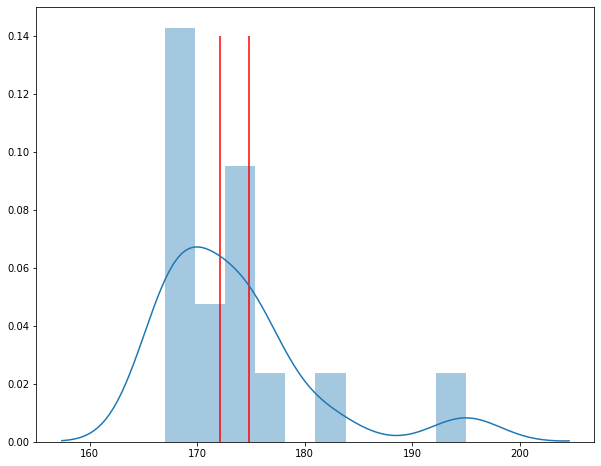

In [5]:
sns.distplot(sample, bins=10)
plt.vlines([start, end], 0, 0.14, color='red')
plt.show()


In [6]:
# METHOD 2
# Confidence interval

from scipy.stats import norm

n = len(sample)
con_coef=0.80

#the alpha level
alpha = 1 - con_coef

x_bar = np.mean(sample) #the mean of sample
sigma = 4

# for 80%: 0.80+((1-0.80)/2) = 0.9
z_critical = stats.norm.ppf(q = 0.9)

zinterval = stats.norm.interval(alpha=con_coef)

st_error = sigma / math.sqrt(n)

CI_lower = x_bar - z_critical * st_error
CI_upper = x_bar + z_critical * st_error

CI_lower, CI_upper

(172.14308590115726, 174.79024743217607)

In [7]:
"With this sample size we are 80% sure that the population mean lies within the range of lower and upper limit."

'With this sample size we are 80% sure that the population mean lies within the range of lower and upper limit.'

In [8]:
#or like this:

con_coef=0.80
n = len(sample)
ave = np.mean(sample)
sigma = 4
st_error = sigma / math.sqrt(n)

scipy.stats.t.interval(con_coef , n, loc=ave, scale=st_error)

(172.08209514852345, 174.8512381848099)

# Challenge 2 
In a sample of 105 shops selected randomly from an area, we note that 27 of them have had losses in this month. Get an confidence interval for the proportion of businesses in the area with losses, to a confidence level of 80% and a confidence level of 90%.

In [9]:
# According to the Central Limit Theorem, we know that the distribution 
# of the sample proportion means is normally distributed with approximately the following parameters:

# Variables 
total_shops = 105;
loss_shops = 27;
score_80 = stats.norm.interval(0.80)[1];
score_90 = stats.norm.interval(0.90)[1];

# Parameters
prop = loss_shops / total_shops;
prop_se = math.sqrt((prop * (1 - prop)) / total_shops);

In [10]:
# METHOD 1
# Confidence interval 80%

import statsmodels.stats.proportion as smp
con_coef = 0.8

lower, upper = smp.proportion_confint (27, 105, alpha=1-con_coef, method='normal')

print ('80% Lower confidence interval:', lower)
print ('80% Upper confidence interval:', upper)


80% Lower confidence interval: 0.20248138545542083
80% Upper confidence interval: 0.3118043288302934


In [11]:
# Confidence interval 90%

import statsmodels.stats.proportion as smp
con_coef = 0.9

lower, upper = smp.proportion_confint (27, 105, alpha=1-con_coef, method='normal')

print ('90% Lower confidence interval:', lower)
print ('90% Upper confidence interval:', upper)

90% Lower confidence interval: 0.1869856177645281
90% Upper confidence interval: 0.32730009652118613


In [12]:
# METHOD 2
# Confidence interval


# Challenge 3 - To practice more
For the same example in challenge 1, calculate a confidence interval for the variance at 90% level.

In [13]:
df = len(sample) - 1
score = stats.chi2.interval(0.90, df)
score

(6.570631383789342, 23.684791304840576)

In [14]:
# As the height of men are independent and identically distributed random variables, 
# we can say that the variance of the heights has a confidence interval such that:

# Variables
df = len(sample) - 1
score = stats.chi2.interval(0.90, df)

# Parameters

n = len(sample)
con_coef=0.90

#the alpha level
alpha = 1 - con_coef

x_bar = np.mean(sample) #the mean of sample
sigma = 4

# for 90%: 0.90+((1-0.90)/2) = 0.95
z_critical = stats.norm.ppf(q = 0.95)

zinterval = stats.norm.interval(alpha=con_coef)

st_error = sigma / math.sqrt(n)

# Confidence interval

CI_lower = x_bar - z_critical * st_error
CI_upper = x_bar + z_critical * st_error

CI_lower, CI_upper

(171.76786914556482, 175.16546418776852)

# Challenge 4 - To practice more
The sulfuric acid content of 7 similar containers is 9.8, 10.2, 10.4, 9.8, 10.0, 10.2 and 9.6 liters. Calculate a 95% confidence interval for the average content of all containers assuming an approximately normal distribution.




In [15]:
# According to the Fisher-Cochran Lemma, the distribution of the sample means for a 
# normal distribution N(μ,σ) with unknown σ has the following parameters:

# Variables
sample = [9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6];
df = len(sample) - 1
score = stats.t.interval(0.95, df)[1]

# Parameters


In [16]:
# METHOD 1
# Confidence interval
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [17]:
mean_confidence_interval(sample, confidence=0.95)

(9.738414120176683, 10.261585879823317)

In [18]:
# METHOD 2
# Confidence interval


# Bonus challenge
The error level or sampling error for the first challenge is given by the following expression:
$$Error = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt n}$$
Where z represents the value for N(0,1).


Suppose that with the previous data in the challenge 1, and with a confidence level of
99% (that is, almost certainly) we want to estimate the average population size, so that the error level committed is not greater than half a centimeter.

i) Determine what size the selected sample of men should be.

In [19]:
# Variables
sample = [167, 167, 168, 168, 168, 169, 171, 172, 173, 175, 175, 175, 177, 182, 195];
pop_std = 4;
score = stats.norm.interval(0.99)[1]
error = 0.5

# Sample Size


ii) For the second challenge, we have the following error:
$$ Error = z_{\frac{\alpha}{2}}\sqrt{\frac{p\times q}{n}} $$

Determine the sample size required to not exceed an error of 1% with a confidence of 80%.

In [20]:
# Variables 
total_shops = 105;
loss_shops = 27;
score = stats.norm.interval(0.80)[1];
error = 0.01

# Parameters


# Sample Size


# Bonus challenge

Let's consider the following problem:

Build a confidence interval of 94% for the real difference between the durations of two brands of spotlights, if a sample of 40 spotlights taken randomly from the first mark gave an average duration of 418 hours, and a sample of 50 bulbs of another brand gave a duration average of 402 hours. The standard deviations of the two
populations are 26 hours and 22 hours, respectively.

Sometimes, we will be interested in the difference of two different groups of random variables. We can also build a confidence interval for that! We have some different cases regarding the variance but for this specific case (the variance are different and known), we have that:

$$\overline{X} - \overline{Y}  \sim N(\mu_{X} - \mu_{Y} , \sqrt{\frac{\sigma_{X}^2}{n_X}+\frac{\sigma_{Y}^2}{n_Y}})$$

Solve the problem with this information.

In [21]:
# Variables
score = stats.norm.interval(0.94)[1]

# Sample 1
size_s1 = 40;
avg_time_s1 = 418;
std_time_s1 = 26;

# Sample 2
size_s2 = 50;
avg_time_s2 = 402;
std_time_s2 = 22;

# Parameters


In [22]:
# METHOD 1
# Confidence interval


In [23]:
# METHOD 2
# Confidence interval
